In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('nba_analysis.csv')

In [ ]:
df

,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
0,3,Steven,Adams,Steven Adams,7,0,7.000000,C,265,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,26.100000,3.11,5.33,0.583,0.00,0.00,0.000,0.78,2.56,0.304,4.67,6.44,11.11,2.56,1.56,0.78,2.44,2.11,7.00,246.566667,96.39,25.22,15.32,13.179526
1,66,Dillon,Brooks,Dillon Brooks,6,6,6.500000,G-F,220,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,17.766667,3.89,8.89,0.438,1.89,3.78,0.500,1.00,1.56,0.643,0.22,1.33,1.56,1.33,0.00,0.44,2.00,0.89,10.67,246.566667,96.39,25.22,15.32,23.655565
2,249,Tyus,Jones,Tyus Jones,6,2,6.166667,G,196,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,24.000000,4.89,10.67,0.458,1.56,4.44,0.350,0.44,1.00,0.444,0.33,1.67,2.00,4.22,0.11,0.67,0.67,1.22,11.78,246.566667,96.39,25.22,15.32,20.629741
3,3198,Ja,Morant,Ja Morant,6,3,6.250000,G,174,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.200000,10.30,21.50,0.480,2.10,5.20,0.403,6.60,8.50,0.782,1.20,4.90,6.20,6.80,0.30,1.20,1.80,3.90,29.30,246.566667,96.39,25.22,15.32,35.244667
4,3199,Desmond,Bane,Desmond Bane,6,5,6.420000,G,215,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.500000,8.30,17.80,0.465,3.80,8.50,0.451,4.30,4.80,0.912,0.50,4.40,4.90,4.80,0.30,0.60,2.40,2.30,24.70,246.566667,96.39,25.22,15.32,26.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,3130,Jalen,Smith,Jalen Smith,6,9,6.750000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,24.000000,4.20,9.50,0.435,1.20,4.10,0.302,1.50,2.20,0.679,1.80,5.80,7.50,1.10,0.80,0.20,2.20,1.50,11.00,230.033333,87.33,22.74,15.75,20.287279
344,3131,Oshae,Brissett,Oshae Brissett,6,7,6.580000,F,210,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,10.900000,0.90,2.40,0.368,0.40,1.50,0.250,0.60,0.80,0.833,0.60,1.00,1.60,0.40,0.00,0.30,0.50,0.50,2.80,230.033333,87.33,22.74,15.75,12.137731
345,3132,Isaiah,Jackson,Isaiah Jackson,6,9,6.750000,F,205,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,18.300000,3.20,5.20,0.618,0.00,0.10,0.000,1.90,2.80,0.676,1.50,3.50,5.10,1.20,1.40,0.50,2.60,1.20,8.40,230.033333,87.33,22.74,15.75,16.966831
346,3133,Aaron,Nesmith,Aaron Nesmith,6,5,6.420000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,20.800000,2.40,6.30,0.386,1.00,3.40,0.290,1.00,1.20,0.818,0.30,2.80,3.10,1.60,0.80,0.30,2.60,1.00,6.90,230.033333,87.33,22.74,15.75,15.310908


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

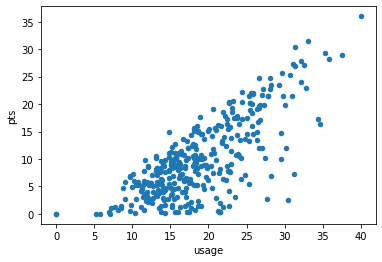

In [ ]:
df.plot.scatter(x='usage', y='pts')

In [ ]:
nba_train = df.loc[:173].copy()
nba_test = df.loc[174:].copy()

In [ ]:
nba_train

,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
0,3,Steven,Adams,Steven Adams,7,0,7.000000,C,265,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,26.100000,3.11,5.33,0.583,0.00,0.00,0.000,0.78,2.56,0.304,4.67,6.44,11.11,2.56,1.56,0.78,2.44,2.11,7.00,246.566667,96.39,25.22,15.32,13.179526
1,66,Dillon,Brooks,Dillon Brooks,6,6,6.500000,G-F,220,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,17.766667,3.89,8.89,0.438,1.89,3.78,0.500,1.00,1.56,0.643,0.22,1.33,1.56,1.33,0.00,0.44,2.00,0.89,10.67,246.566667,96.39,25.22,15.32,23.655565
2,249,Tyus,Jones,Tyus Jones,6,2,6.166667,G,196,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,24.000000,4.89,10.67,0.458,1.56,4.44,0.350,0.44,1.00,0.444,0.33,1.67,2.00,4.22,0.11,0.67,0.67,1.22,11.78,246.566667,96.39,25.22,15.32,20.629741
3,3198,Ja,Morant,Ja Morant,6,3,6.250000,G,174,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.200000,10.30,21.50,0.480,2.10,5.20,0.403,6.60,8.50,0.782,1.20,4.90,6.20,6.80,0.30,1.20,1.80,3.90,29.30,246.566667,96.39,25.22,15.32,35.244667
4,3199,Desmond,Bane,Desmond Bane,6,5,6.420000,G,215,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.500000,8.30,17.80,0.465,3.80,8.50,0.451,4.30,4.80,0.912,0.50,4.40,4.90,4.80,0.30,0.60,2.40,2.30,24.70,246.566667,96.39,25.22,15.32,26.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,274,Kawhi,Leonard,Kawhi Leonard,6,7,6.583333,F,230,13,LAC,LA,West,Pacific,LA Clippers,Clippers,4.666667,0.89,2.00,0.444,0.11,0.67,0.167,0.89,1.00,0.889,0.44,1.00,1.44,0.44,0.00,0.33,0.56,0.44,2.78,244.466667,84.68,19.80,15.63,27.677140
170,328,Marcus,Morris,Marcus Morris,6,9,6.750000,F,235,13,LAC,LA,West,Pacific,LA Clippers,Clippers,23.216667,4.44,9.00,0.494,1.44,3.78,0.382,0.44,0.44,1.000,0.44,4.22,4.67,2.00,0.11,0.78,1.89,0.67,10.78,244.466667,84.68,19.80,15.63,19.053339
171,380,Norman,Powell,Norman Powell,6,4,6.333333,F-G,215,13,LAC,LA,West,Pacific,LA Clippers,Clippers,25.433333,4.11,10.11,0.407,1.11,4.00,0.278,1.56,2.33,0.667,0.56,2.89,3.44,1.33,0.33,0.56,1.44,2.44,10.89,244.466667,84.68,19.80,15.63,23.937481
172,467,John,Wall,John Wall,6,4,6.333333,G,210,13,LAC,LA,West,Pacific,LA Clippers,Clippers,16.550000,3.89,8.56,0.455,0.67,2.67,0.250,1.56,2.56,0.609,0.33,1.33,1.67,3.67,0.22,0.67,1.22,1.22,10.00,244.466667,84.68,19.80,15.63,29.554181


In [ ]:
nba_test

,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
174,3175,Moses,Brown,Moses Brown,7,2,7.170000,C,245,13,LAC,Los Angeles,West,Pacific,Los Angeles Clippers,Clippers,4.1,1.3,1.7,0.800,0.0,0.0,0.000,0.4,0.8,0.571,0.7,1.0,1.7,0.0,0.4,0.0,0.6,0.1,3.1,244.466667,84.68,19.80,15.63,23.539320
175,3176,Terrance,Mann,Terrance Mann,6,5,6.420000,G,215,13,LAC,Los Angeles,West,Pacific,Los Angeles Clippers,Clippers,17.9,2.7,4.6,0.581,0.3,1.5,0.208,0.8,1.2,0.684,0.6,2.4,2.9,1.4,0.3,0.4,1.7,0.8,6.5,244.466667,84.68,19.80,15.63,14.852196
176,3177,Brandon,Boston Jr.,Brandon Boston Jr.,6,6,6.500000,G,188,13,LAC,Los Angeles,West,Pacific,Los Angeles Clippers,Clippers,3.2,1.0,2.0,0.500,0.4,0.6,0.667,0.2,0.4,0.500,0.2,0.2,0.4,0.0,0.0,0.0,0.2,0.0,2.6,244.466667,84.68,19.80,15.63,30.496108
177,3178,Amir,Coffey,Amir Coffey,6,7,6.580000,G,210,13,LAC,Los Angeles,West,Pacific,Los Angeles Clippers,Clippers,9.0,0.5,1.5,0.316,0.1,0.3,0.250,1.2,1.4,0.833,0.2,0.5,0.7,0.6,0.1,0.2,0.9,0.3,2.2,244.466667,84.68,19.80,15.63,12.038986
178,38,Malik,Beasley,Malik Beasley,6,5,6.416667,G,195,29,UTA,Utah,West,Northwest,Utah Jazz,Jazz,24.4,3.9,9.9,0.394,2.2,5.7,0.386,0.7,0.8,0.875,0.8,2.2,3.0,1.1,0.2,1.1,0.7,0.5,10.7,232.900000,88.70,20.50,14.50,18.290629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,3130,Jalen,Smith,Jalen Smith,6,9,6.750000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,24.0,4.2,9.5,0.435,1.2,4.1,0.302,1.5,2.2,0.679,1.8,5.8,7.5,1.1,0.8,0.2,2.2,1.5,11.0,230.033333,87.33,22.74,15.75,20.287279
344,3131,Oshae,Brissett,Oshae Brissett,6,7,6.580000,F,210,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,10.9,0.9,2.4,0.368,0.4,1.5,0.250,0.6,0.8,0.833,0.6,1.0,1.6,0.4,0.0,0.3,0.5,0.5,2.8,230.033333,87.33,22.74,15.75,12.137731
345,3132,Isaiah,Jackson,Isaiah Jackson,6,9,6.750000,F,205,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,18.3,3.2,5.2,0.618,0.0,0.1,0.000,1.9,2.8,0.676,1.5,3.5,5.1,1.2,1.4,0.5,2.6,1.2,8.4,230.033333,87.33,22.74,15.75,16.966831
346,3133,Aaron,Nesmith,Aaron Nesmith,6,5,6.420000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,20.8,2.4,6.3,0.386,1.0,3.4,0.290,1.0,1.2,0.818,0.3,2.8,3.1,1.6,0.8,0.3,2.6,1.0,6.9,230.033333,87.33,22.74,15.75,15.310908


In [ ]:
ashen_model = LinearRegression()
ashen_model.fit(
    X= nba_train[['usage']],
    y= nba_train['pts']
)

LinearRegression()

In [ ]:
ashen_model.predict(
    X= nba_test[['usage']]
)

array([13.96097206,  6.75810179, 19.72914569,  4.42554821,  9.60905574,
       15.22222629,  8.31459701,  7.55369997, 14.6653747 ,  9.37313494,
       15.01093464,  6.90395433, 13.31347512,  5.56745318,  2.88820583,
       13.08394572, 27.5805727 ,  4.04774886, 14.57993367,  2.65579942,
       13.24788158,  0.39991126,  6.91394896, 16.4087911 ,  4.11046   ,
        1.72480154,  7.96690427, 15.51519791,  6.06990823, 21.07562652,
        7.05938944, 12.10486748, 16.28696154,  4.4747223 ,  4.47239216,
        8.57605325,  6.23800138,  7.34747741,  4.70165412,  5.88926481,
        7.42910839, 15.82457414, 24.12572875,  5.75323145, 10.76313859,
        7.05671825, 16.25611365, 19.91671629,  8.76528904,  4.90320426,
        9.5180937 ,  2.55586656,  8.10779868, 20.44606718,  4.20512703,
        5.44776441,  4.12972975,  6.69620405,  7.63952947,  5.26252053,
       10.22526478,  8.50406184, 13.26292152,  7.72186634, 15.39902359,
       11.87905845,  9.15146857, 12.30934223, 18.91630233,  5.87

In [ ]:
ashen_model.coef_

array([0.82914324])

In [ ]:
ashen_model.intercept_

-5.556495932455569

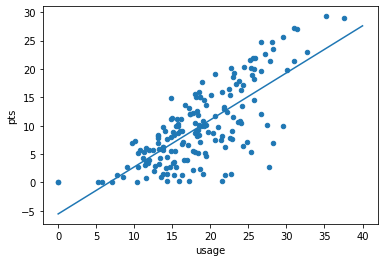

In [ ]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["usage"] = np.linspace(0, 40, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    ashen_model.predict(X_new), # y values in Series.plot.line()
    index=X_new["usage"]    # x values in Series.plot.line()
)

# plot the data, then the model
nba_train.plot.scatter(x="usage", y="pts")
y_new_.plot.line()

Points = 0.82914324(Usage Rate) - 5.556495932455569